## Correlated Walker—Functionality Demonstration

### 1. Simple Correlated Walk generation with Chi-Distribution Kernel

You have 14958.765625 MiB of free RAM
walker requires 39.672852 MiB of RAM
(1/50)
(2/50)
(3/50)
(4/50)
(5/50)
(6/50)
(7/50)
(8/50)
(9/50)
(10/50)
(11/50)
(12/50)
(13/50)
(14/50)
(15/50)
(16/50)
(17/50)
(18/50)
(19/50)
(20/50)
(21/50)
(22/50)
(23/50)
(24/50)
(25/50)
(26/50)
(27/50)
(28/50)
(29/50)
(30/50)
(31/50)
(32/50)
(33/50)
(34/50)
(35/50)
(36/50)
(37/50)
(38/50)
(39/50)
(40/50)
(41/50)
(42/50)
(43/50)
(44/50)
(45/50)
(46/50)
(47/50)
(48/50)
(49/50)
DP matrix serialized to: /tmp/dp_1406bece
Debug: walk.length = 50


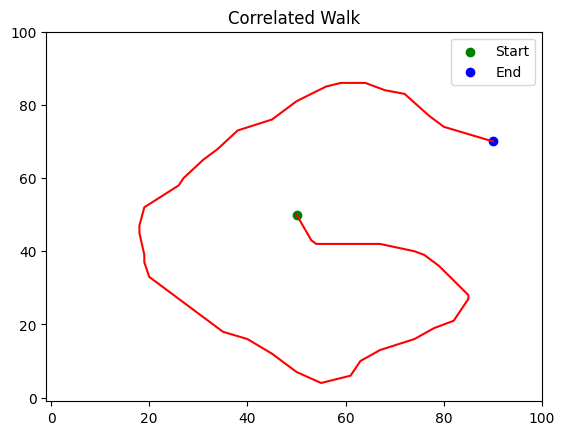

(1/100)
(2/100)
(3/100)
(4/100)
(5/100)
(6/100)
(7/100)
(8/100)
(9/100)
(10/100)
(11/100)
(12/100)
(13/100)
(14/100)
(15/100)
(16/100)
(17/100)
(18/100)
(19/100)
(20/100)
(21/100)
(22/100)
(23/100)
(24/100)
(25/100)
(26/100)
(27/100)
(28/100)
(29/100)
(30/100)
(31/100)
(32/100)
(33/100)
(34/100)
(35/100)
(36/100)
(37/100)
(38/100)
(39/100)
(40/100)
(41/100)
(42/100)
(43/100)
(44/100)
(45/100)
(46/100)
(47/100)
(48/100)
(49/100)
(50/100)
(51/100)
(52/100)
(53/100)
(54/100)
(55/100)
(56/100)
(57/100)
(58/100)
(59/100)
(60/100)
(61/100)
(62/100)
(63/100)
(64/100)
(65/100)
(66/100)
(67/100)
(68/100)
(69/100)
(70/100)
(71/100)
(72/100)
(73/100)
(74/100)
(75/100)
(76/100)
(77/100)
(78/100)
(79/100)
(80/100)
(81/100)
(82/100)
(83/100)
(84/100)
(85/100)
(86/100)
(87/100)
(88/100)
(89/100)
(90/100)
(91/100)
(92/100)
(93/100)
(94/100)
(95/100)
(96/100)
(97/100)
(98/100)
(99/100)
(1/100)
(2/100)
(3/100)
(4/100)
(5/100)
(6/100)
(7/100)
(8/100)
(9/100)
(10/100)
(11/100)
(12/100)
(13/100)
(14/100)
(

In [1]:

from random_walk_package.core.CorrelatedWalker import CorrelatedWalker

with CorrelatedWalker(T=50, W=100, H=100, D=8, S=7) as walker:
    walker.generate(start_x=50, start_y=50)
    path1 = walker.backtrace(end_x=90, end_y=70, plot=True)

### 2. Define custom kernels

1. **Pass a kernel matrix:**
   Provide a `numpy` array of type `float` containing the kernel weights, along with the corresponding step size `S`.
   The parameter `S` defines the kernel width as

   $\text{kernel\_width} = 2S + 1$

   The array must therefore contain exactly `kernel_width × kernel_width` elements.

2. **Specify the number of directions (`D`):**
   Pass `D` as the number of directions. The resulting kernel will consist of `D` rotated versions of the base kernel matrix.
   Each matrix for direction


   $d \in [0, D - 1]$


   corresponds to the base kernel rotated by

    $d \times \frac{360°}{D}$.




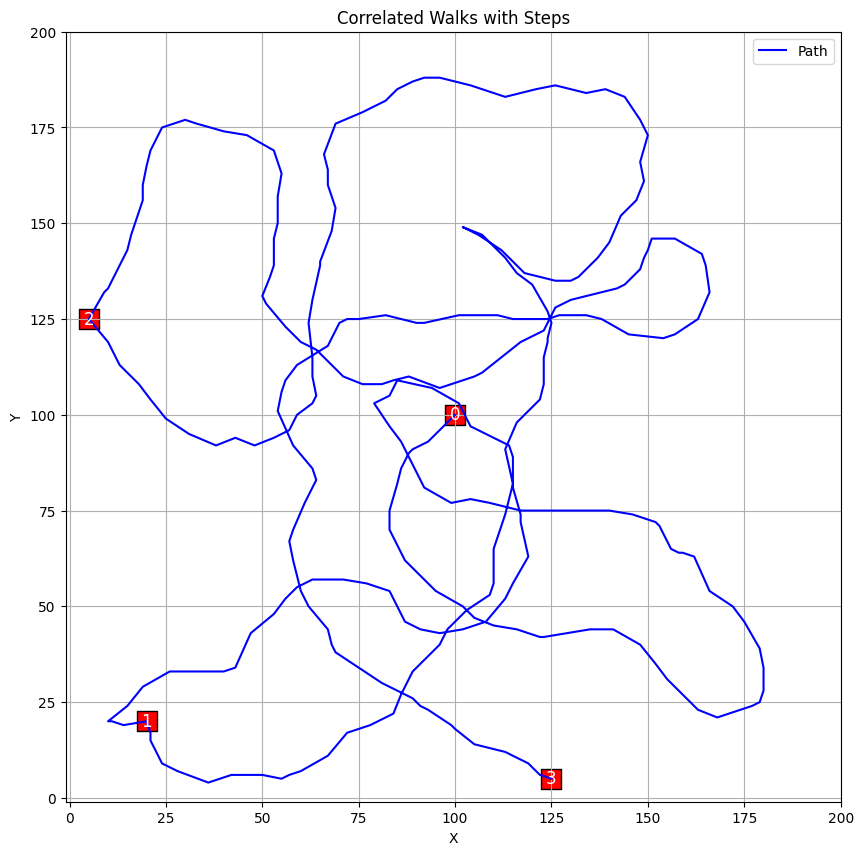

In [2]:
import numpy as np

S = 10
with CorrelatedWalker(T=100, W=200, H=200, D=8, S=7) as walker:
    x, y = np.meshgrid(np.arange(-S, S + 1), np.arange(-S, S + 1))
    angle = np.arctan2(y, x)
    radius = np.sqrt(x ** 2 + y ** 2)

    mask = (np.abs(angle) < np.deg2rad(30)) & (radius <= S)
    custom_kernel = np.exp(-0.5 * (radius / (S / 2)) ** 2) * mask
    custom_kernel /= custom_kernel.sum()

    walker.set_kernel(custom_kernel, S=S)
    steps = [(100, 100), (20, 20), (5, 125), (125, 5)]
    walker.multistep_walk(steps=steps, plot=True)

## 3. Terrain-based Walks

- **Terrain objects** influence how the walker moves. They are defined by text files containing 'delim'-separated MESA landcover values.
- Different **landmark types** receive different kernel parameters. In this example, water areas are avoided.
  You can customize the kernel mapping based on the animal type or use case.
  There are five presets: `LIGHT`, `MEDIUM`, `HEAVY`, `AMPHIBIAN`, and `AIRBORNE`, each with predefined kernel parameters.
  Kernel parameters include `step_size`, `diffusity`, `width`, and `height`, as well as `transition_probabilities` between different landmarks and can be fully customized for individual landmarks.

> **Note:**
> When a terrain and its corresponding kernel mapping are passed to the `Walker` object, the walker takes ownership of their allocated memory.
> This means that once the walker goes out of scope, the terrain object is automatically freed on the C side.
> This behavior is intentional and ensures that Python users do not need to perform manual memory management.

In [3]:
from random_walk_package.bindings.data_structures.kernel_terrain_mapping import *
from random_walk_package.bindings import *

terrain = create_terrain_map('terrain_baboons.txt', delim=' ')
print(terrain.contents.width, terrain.contents.height)
kernel_mapping = create_correlated_kernel_parameters(animal_type=MEDIUM, base_step_size=7)
set_landmark_mapping(kernel_mapping, GRASSLAND, is_brownian=False, step_size=10, directions=8, diffusity=1)
set_landmark_mapping(kernel_mapping, TREE_COVER, is_brownian=False, step_size=2, directions=12, diffusity=2.6)
set_forbidden_landmark(kernel_mapping, WATER)

#### Now the terrain-based walk can be created using the parameters defined above
(If no custom kernel mapping is provided, a default one will be used.)

In [4]:
walker = CorrelatedWalker(T=200, terrain=terrain, kernel_mapping=kernel_mapping)
walker.generate_from_terrain(start_x=50, start_y=50)

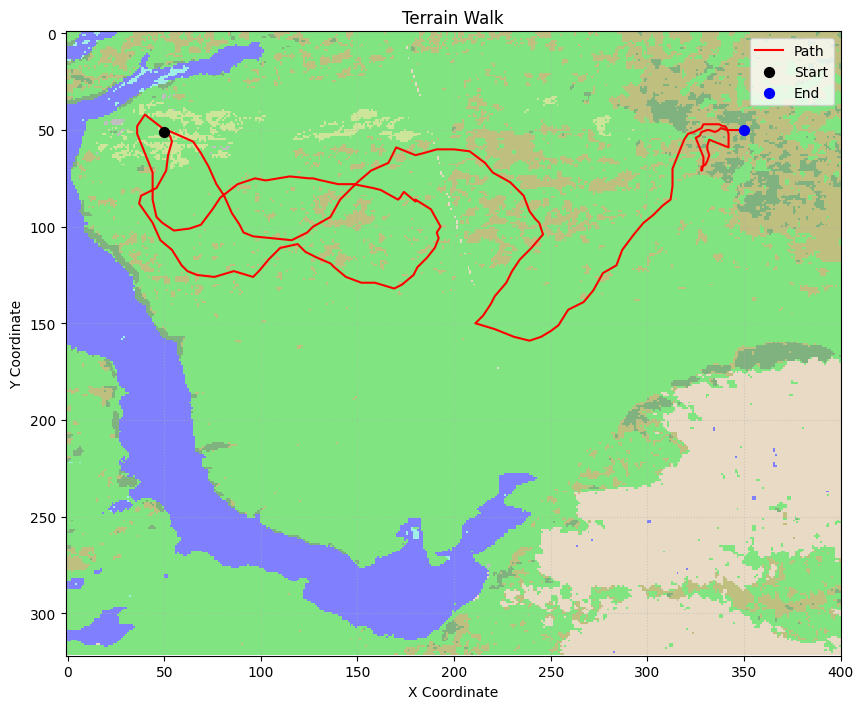

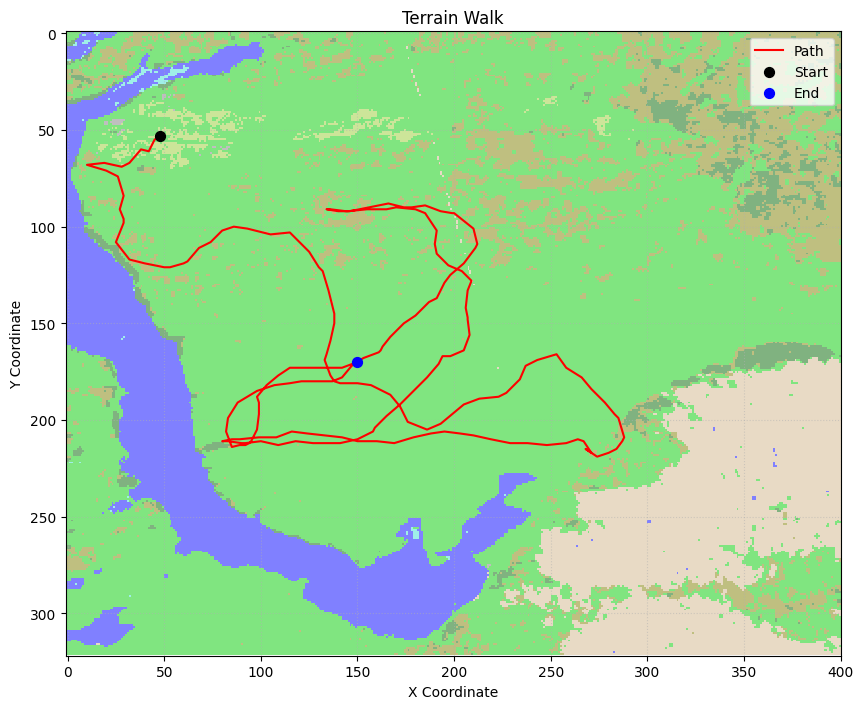

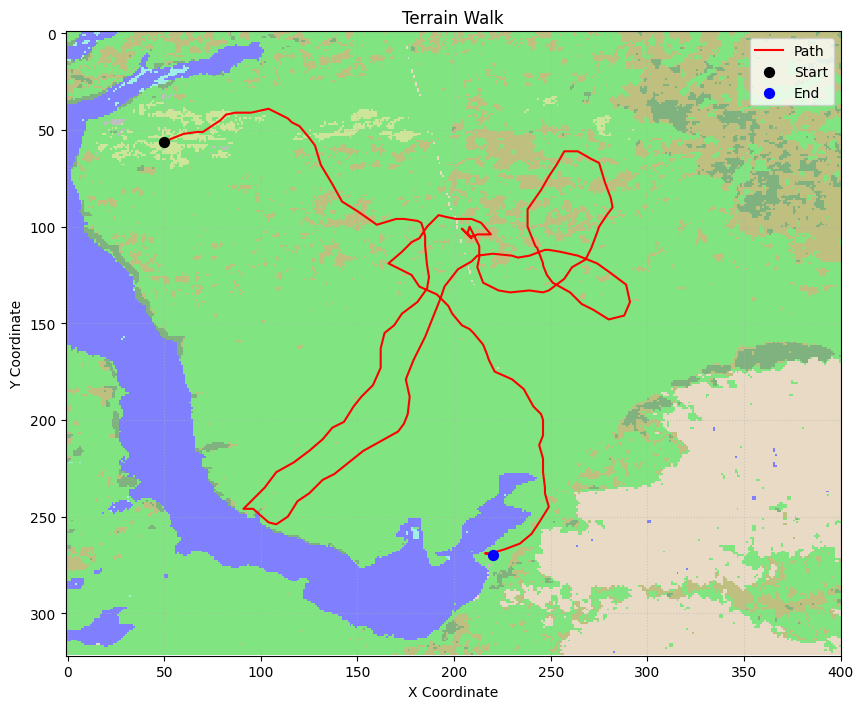

In [8]:
path3 = walker.backtrace_from_terrain(end_x=350, end_y=50, plot=True)
print(f"   Terrain Walk: {len(path3)} Points")
path4 = walker.backtrace_from_terrain(end_x=150, end_y=170, plot=True)
print(f"   Terrain Walk: {len(path3)} Points")
path5 = walker.backtrace_from_terrain(end_x=220, end_y=270, plot=True)
print(f"   Terrain Walk: {len(path3)} Points")

#### Now the same with multiple steps at once:

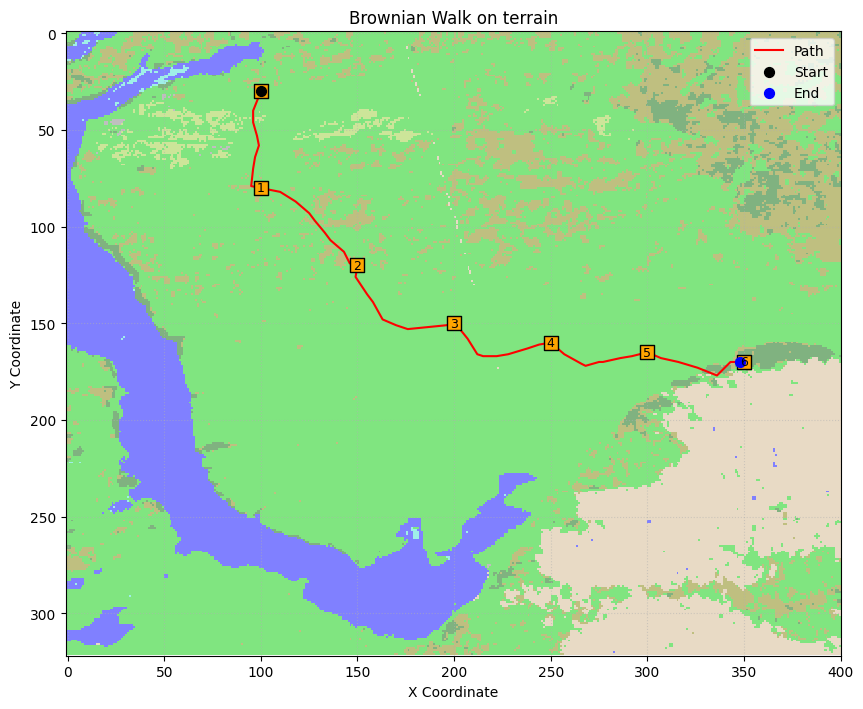

In [22]:
walker = CorrelatedWalker(T=10, terrain=terrain, kernel_mapping=kernel_mapping)
steps = [(100, 30), (100, 80), (150, 120), (200, 150), (250, 160), (300, 165), (350, 170)]
path3 = walker.generate_from_terrain_multistep(steps=steps, plot=True)
print(f"   Terrain Walk Multiple Steps: {len(path3)} Points")

### 4. Serialization

Correlated Walk dynamic programming matrices can become very large and consume significant amounts of RAM.
The `CorrelatedWalker` automatically determines whether serialization is necessary. This happens whenever the estimated memory requirement exceeds the available system RAM.

In that case, each time step is serialized to disk, ensuring that at most two timesteps are kept in memory at any given time.
The `generate` functions then return the output path where the serialized data is stored.

This path must be passed to the corresponding `backtrace` functions for the generation of walks.
Alternatively, serialization can be manually toggled by setting the `use_serialization` flag, regardless of RAM availability.


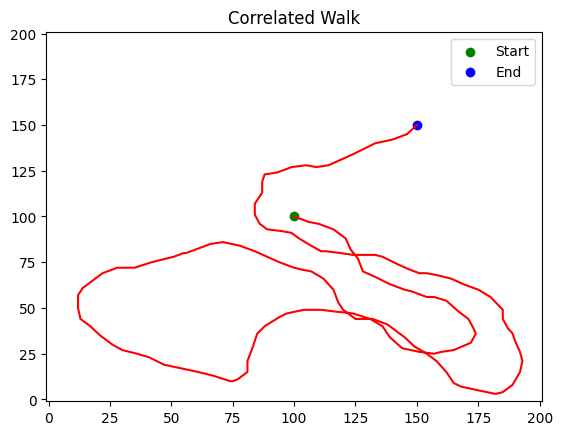

In [23]:
dp_folder_path = None
with CorrelatedWalker(T=150, W=201, H=201, D=16, S=7) as walker:
    dp_folder_path = walker.generate(start_x=100, start_y=100, use_serialization=True)
    walker.backtrace(end_x=150, end_y=150, dp_folder=dp_folder_path, plot=True)

#### The serialized data can also be reused in a different session or with another walker instance, for example:

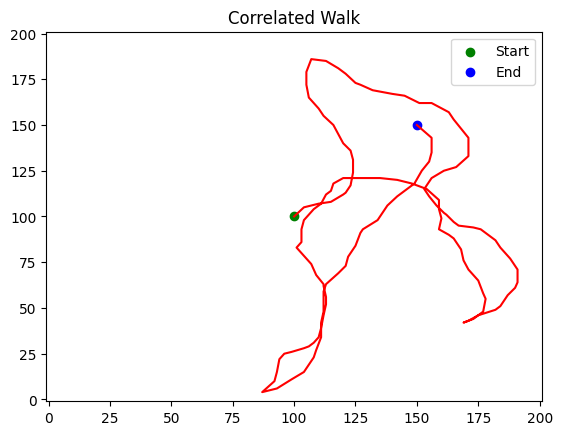

In [29]:
with CorrelatedWalker(T=150, W=201, H=201, D=16, S=7) as walker2:
    walker.set_kernel()
    walker.backtrace(end_x=150, end_y=150, dp_folder=dp_folder_path, plot=True)